### Описание задачи

Цель: Построить модель машинного обучения для предсказания цены автомобиля на основе его характеристик (задача регрессии).

### Чтение данных

Подключим необходимые библиотеки:

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('./cars.csv')

df.drop(columns=['location_region','feature_0','feature_1','feature_2','feature_3','feature_4',
                    'feature_5','feature_6','feature_7','feature_8','feature_9'],inplace=True) 

df.head(10)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,has_warranty,state,drivetrain,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,10900.00,False,9,13,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,universal,False,owned,all,5000.00,True,12,54,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,suv,False,owned,all,2800.00,True,4,72,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,sedan,False,owned,all,9999.00,True,9,42,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,universal,False,owned,all,2134.11,True,14,7,7
5,Subaru,Outback,automatic,silver,132449,2011,gasoline,False,gasoline,2.5,universal,False,owned,all,14700.00,True,20,56,67
6,Subaru,Forester,automatic,black,318280,1998,gasoline,False,gasoline,2.5,universal,False,owned,all,3000.00,True,8,147,307
7,Subaru,Legacy,automatic,silver,350000,2004,gasoline,False,gasoline,2.5,sedan,False,owned,all,4500.00,False,7,29,73
8,Subaru,Outback,automatic,grey,179000,2010,gasoline,False,gasoline,2.5,universal,False,owned,all,12900.00,False,17,33,87
9,Subaru,Forester,automatic,silver,571317,1999,gasoline,False,gasoline,2.5,universal,False,owned,all,4200.00,True,8,11,43


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  number_of_photos   385

### Визуализировать данные и вычислить основные характеристики:

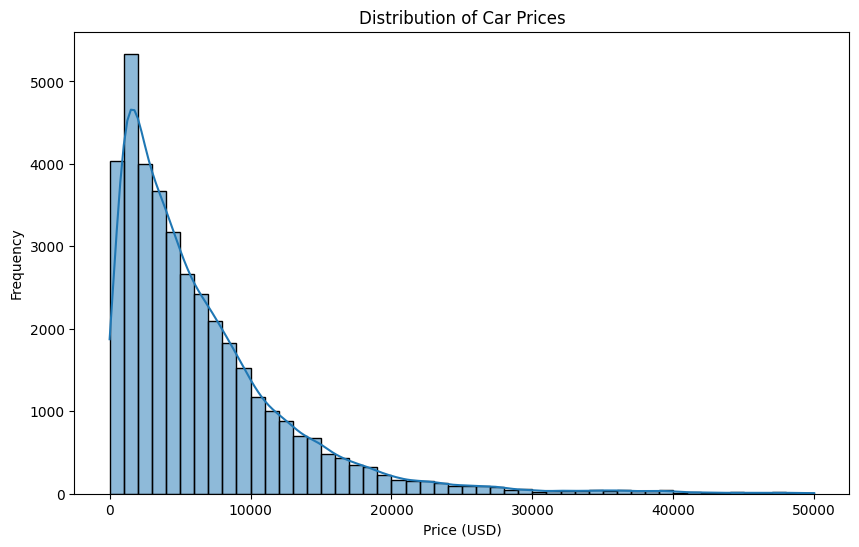

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_usd'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Price (USD)')

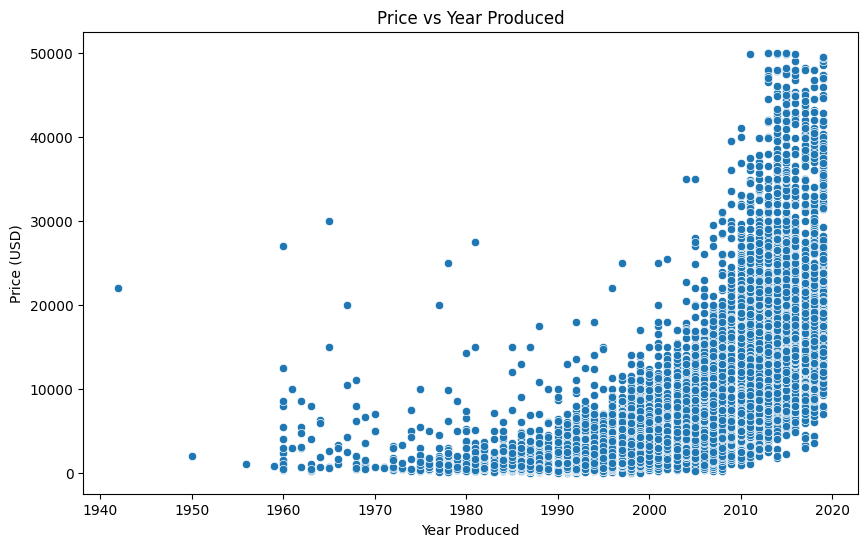

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year_produced', y='price_usd', data=df)
plt.title('Price vs Year Produced')
plt.xlabel('Year Produced')
plt.ylabel('Price (USD)')

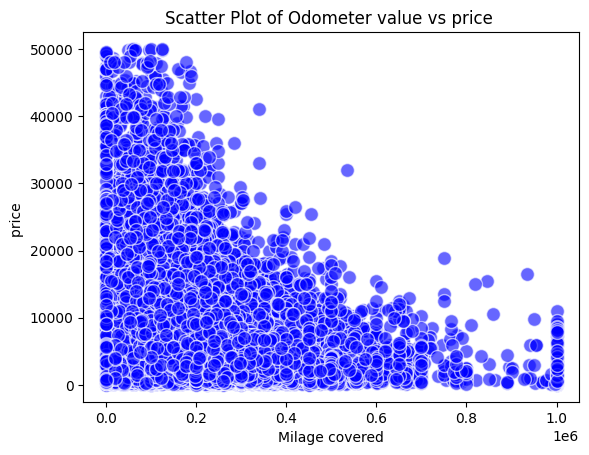

In [38]:
plt.scatter(df['odometer_value'], df['price_usd'],c='blue', alpha=0.6, edgecolors='w', s=100)
plt.xlabel('Milage covered')
plt.ylabel('price ')
plt.title('Scatter Plot of Odometer value vs price ')
plt.show()

In [39]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [40]:
corr_matrix = df.corr()
corr_matrix

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed
odometer_value,1.000000,-0.488679,0.057786,0.105704,-0.189498,-0.421204,0.042342,-0.143708,-0.020961,-0.000428
year_produced,-0.488679,1.000000,-0.074686,0.005059,0.209231,0.705511,-0.057937,0.258180,0.007945,-0.017001
engine_has_gas,0.057786,-0.074686,1.000000,0.084579,-0.020667,-0.062528,0.018646,-0.032101,0.000058,0.018264
engine_capacity,0.105704,0.005059,0.084579,1.000000,-0.054583,0.296597,0.081636,0.106691,0.079152,0.080081
has_warranty,-0.189498,0.209231,-0.020667,-0.054583,1.000000,0.285532,0.117775,0.084045,-0.023087,-0.061798
price_usd,-0.421204,0.705511,-0.062528,0.296597,0.285532,1.000000,-0.000503,0.316859,0.057382,0.033524
is_exchangeable,0.042342,-0.057937,0.018646,0.081636,0.117775,-0.000503,1.000000,0.103725,0.106213,0.026897
number_of_photos,-0.143708,0.258180,-0.032101,0.106691,0.084045,0.316859,0.103725,1.000000,0.073891,-0.028255
up_counter,-0.020961,0.007945,0.000058,0.079152,-0.023087,0.057382,0.106213,0.073891,1.000000,0.698116
duration_listed,-0.000428,-0.017001,0.018264,0.080081,-0.061798,0.033524,0.026897,-0.028255,0.698116,1.000000


Интерпретация данных:

- odometer_value: пробег автомобилей лежит в широком диапазоне, со средней величиной около 248864 км. Высокое стандартное отклонение указывает на значительное разнообразие пробегов.
- year_produced: автомобили в датасете в основном современные, со средним годом производства около 2003 года. Есть некоторые старые модели, произведенные в 1998 году, но большинство произведено после.
- engine_capacity: средний объем двигателя около 2.06 литра. Большинство автомобилей имеют объем двигателя в диапазоне от 1.6 до 2.3 литра.
- price_usd: средняя цена автомобиля около 6640 долларов США. Высокое стандартное отклонение показывает, что цены сильно варьируются.
- number_of_photos: среднее количество фотографий на объявление около 9.65. Размах довольно большой, что скорее всего указывает на значительное различие в количестве фотографий.
- up_counter: количество обновлений объявления варьируется, среднее значение составляет 16.30, разброс достаточно большой.
- duration_listed: объявления в среднем находятся в списке около 80 дней. В основном они находятся в списке от 23 до 91 дня

### Обработка пропущенных значений

In [41]:
df.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
number_of_photos      0
up_counter            0
duration_listed       0
dtype: int64

Как видно из таблицы пропущенных значений не так много, поэтому просто удалим их:

In [42]:
df.dropna(inplace=True)
df.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
number_of_photos     0
up_counter           0
duration_listed      0
dtype: int64

### Обработка категориальных признаков

In [43]:
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import OneHotEncoder


temp_cat_cols = ['transmission', 'color',
       'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain',
       'is_exchangeable','has_warranty','has_warranty','engine_has_gas']

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
for col in temp_cat_cols:
  df[col] = encoder.fit_transform(df[[col]])


mean_target = df.groupby('model_name')['price_usd'].mean()
df['model_name']=df['model_name'].map(mean_target)

n_features = 30
hasher = FeatureHasher(n_features=n_features, input_type='string')

hashed_features = hasher.transform(df['manufacturer_name'].apply(lambda x:[x]))

hashed_array = hashed_features.toarray()

hashed_df = pd.DataFrame(hashed_array, columns=[f'hashed_feature_{i}' for i in range(n_features)])
df = pd.concat([df,hashed_df],axis=1)

In [44]:
df.head(10)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,hashed_feature_20,hashed_feature_21,hashed_feature_22,hashed_feature_23,hashed_feature_24,hashed_feature_25,hashed_feature_26,hashed_feature_27,hashed_feature_28,hashed_feature_29
0,Subaru,8873.794925,1.0,0.0,190000.0,2010.0,0.0,1.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Subaru,8873.794925,1.0,0.0,290000.0,2002.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Subaru,8255.028000,1.0,0.0,402000.0,2001.0,0.0,1.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Subaru,6863.427857,0.0,0.0,10000.0,1999.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Subaru,4428.642500,1.0,1.0,280000.0,2001.0,0.0,1.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Subaru,8873.794925,1.0,0.0,132449.0,2011.0,0.0,1.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Subaru,8255.028000,1.0,1.0,318280.0,1998.0,0.0,1.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Subaru,4428.642500,1.0,0.0,350000.0,2004.0,0.0,1.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Subaru,8873.794925,1.0,0.0,179000.0,2010.0,0.0,1.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Subaru,8255.028000,1.0,0.0,571317.0,1999.0,0.0,1.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Нормализация данных

In [46]:
from sklearn.preprocessing import StandardScaler

num_cols = ['odometer_value', 'year_produced', 'engine_capacity', 'number_of_photos', 'up_counter', 'duration_listed']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head(10)


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,hashed_feature_20,hashed_feature_21,hashed_feature_22,hashed_feature_23,hashed_feature_24,hashed_feature_25,hashed_feature_26,hashed_feature_27,hashed_feature_28,hashed_feature_29
0,Subaru,8873.794925,1.0,0.0,-0.432979,0.875318,0.0,1.0,0.0,0.662782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Subaru,8873.794925,1.0,0.0,0.302004,-0.116665,0.0,1.0,0.0,1.407751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Subaru,8255.028000,1.0,0.0,1.125184,-0.240663,0.0,1.0,0.0,0.662782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Subaru,6863.427857,0.0,0.0,-1.755946,-0.488659,0.0,1.0,0.0,1.407751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Subaru,4428.642500,1.0,1.0,0.228505,-0.240663,0.0,1.0,0.0,0.662782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Subaru,8873.794925,1.0,0.0,-0.855968,0.999316,0.0,1.0,0.0,0.662782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Subaru,8255.028000,1.0,1.0,0.509857,-0.612656,0.0,1.0,0.0,0.662782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Subaru,4428.642500,1.0,0.0,0.742993,0.131331,0.0,1.0,0.0,0.662782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Subaru,8873.794925,1.0,0.0,-0.513827,0.875318,0.0,1.0,0.0,0.662782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Subaru,8255.028000,1.0,0.0,2.369633,-0.488659,0.0,1.0,0.0,0.662782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Разбить данные на обучающую и тестовую выборки

In [54]:
from sklearn.model_selection import train_test_split

df = df.dropna()

X = df.drop(['price_usd','manufacturer_name'], axis=1)
y = df['price_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30808, 47)
(7703, 47)
(30808,)
(7703,)


### Запустим регрессию ближайших соседей

In [56]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

In [62]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

print(f"R²: {r2}")

R²: 0.8264269733407972


### Подберем оптимальное кол-во соседей k

In [63]:
from sklearn.metrics import mean_squared_error

k_values = range(1, 16)
errors = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)
    print(f"k={k}: MSE={mse}")

best_k = k_values[errors.index(min(errors))]
print(f"Оптимальное значение k: {best_k}")

k=1: MSE=10237229.483272191
k=2: MSE=8223175.768062641
k=3: MSE=7462569.3752195
k=4: MSE=7256701.885619846
k=5: MSE=7279742.250943895
k=6: MSE=7394921.364305408
k=7: MSE=7395684.663693423
k=8: MSE=7492530.444581035
k=9: MSE=7571282.3356835
k=10: MSE=7630015.388509099
k=11: MSE=7732462.752482964
k=12: MSE=7835059.885023596
k=13: MSE=7985257.12252061
k=14: MSE=8085207.723505093
k=15: MSE=8198767.0427560005
Оптимальное значение k: 4


Вывод: оптимальное кол-во соседей k получилось равное 4.

### Вычислим ошибки на обучающей и тестовой выборке

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_train_pred = knn_regressor.predict(X_train)

y_test_pred = knn_regressor.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)

print(f"Ошибки на обучающей выборке:")
print(f"Mean Absolute Error (MAE): {train_mae}")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"Root Mean Squared Error (RMSE): {train_rmse}")
print(f"R²: {train_r2}")

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Ошибки на тестовой выборке:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"Root Mean Squared Error (RMSE): {test_rmse}")
print(f"R²: {test_r2}")


Ошибки на обучающей выборке:
Mean Absolute Error (MAE): 1450.6174090063187
Mean Squared Error (MSE): 6838388.583746671
Root Mean Squared Error (RMSE): 2615.031277775979
R²: 0.8337214167469464
Ошибки на тестовой выборке:
Mean Absolute Error (MAE): 1582.8525789951968
Mean Squared Error (MSE): 8198767.0427560005
Root Mean Squared Error (RMSE): 2863.348920888965
R²: 0.8045143960556622


#### Ошибки на обучающей выборке:

- MAE, MSE, RMSE и R² достаточно неплохие => модель хорошо обучилась на этих данных.

- Высокое значение R² (0.83) указывает на то, что модель объясняет 83% вариаций целевой переменной на обучающих данных.

#### Ошибки на тестовой выборке:

- Метрики на тестовых данных также показывают, что модель хорошо справляется с предсказанием новых данных.

- R² на тестовых данных (0.80) показывает, что модель объясняет 80% вариаций целевой переменной.

### Запустим другие методы решения задачи регрессии

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }

for name, metrics in results.items():
    print(f"{name}:")
    print(f"Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']}")
    print(f"R²: {metrics['R²']}")
    print()


Linear Regression:
Mean Absolute Error (MAE): 1996.6209360141281
Mean Squared Error (MSE): 9756950.974679511
Root Mean Squared Error (RMSE): 3123.611847634003
R²: 0.7673621601889826

Decision Tree:
Mean Absolute Error (MAE): 1393.6459198756156
Mean Squared Error (MSE): 5709632.877531256
Root Mean Squared Error (RMSE): 2389.4838098491596
R²: 0.8638635510017549

Random Forest:
Mean Absolute Error (MAE): 1010.6000451787007
Mean Squared Error (MSE): 3179090.764123271
Root Mean Squared Error (RMSE): 1783.0004947064012
R²: 0.9242000077843902



#### Сравним результаты методов:

Метод ближайших соседей и кол-вом соседей k = 5 показал себя хорошо в 83% случаев.

Метод Linear Regression показал - 76%

Метод Decision Tree показал - 86%

Метод Random Forest показал - 92%

Можно сделать вывод, что метод Random Forest показал самый лучший результат конкретно в данной задаче, а метод Linear Regression показал наихудший результат из всех.

### Несбалансированность классов

Не релевантен, так как мы решаем задачу регрессии.

### Исключение коррелированных переменных

In [66]:
threshold = 0.8
corr_pairs = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)
high_corr_pairs = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]

print("Пары переменных с высокой корреляцией:")
print(high_corr_pairs)

variables_to_drop = set()
for pair in high_corr_pairs.index:
    var1, var2 = pair
    variables_to_drop.add(var2)

data_cleaned = df.drop(columns=variables_to_drop)
print(f"Исключены переменные: {variables_to_drop}")


Пары переменных с высокой корреляцией:
Series([], dtype: float64)
Исключены переменные: set()


Нам нужно исключить коррелированные переменные, так как сильная корреляция между переменными может ухудшить качество модели, так как они могут внести избыточную информацию. В данном случае получилось так, что коррелированные переменные отсутствуют. И, следовательно, все признаки независимы.

### Вывод

В данной работе я расммотрел задачу регрессии. В ходе обучения модели выяснилось, что самым лучшим подходом оказалось использование метода - Random Forest, который показал самый высокий результат их всех. Самым неэффективным оказался метод Линейной Регрессии, он показал не самый лучший результат. Метод ближайшего соседа с параметром соседей k = 5, который требовался по условию задачи показал 83% точности предсказания, что достаточно неплохо, но есть методы, которые показали результаты лучше - Decision Tree (86%) и Random Forest (92%). В ходе выполнения работы были выполнены все пункты, которые предлагались в задании.